Enter number of students: 3

Enter student 1 name: Tom
Enter mark for subject 1: 90
Enter mark for subject 2: 87
Enter mark for subject 3: 69

Enter student 2 name: Sam
Enter mark for subject 1: 82
Enter mark for subject 2: 94
Enter mark for subject 3: 75

Enter student 3 name: Anna
Enter mark for subject 1: 93
Enter mark for subject 2: 89
Enter mark for subject 3: 90

Student Report:
-----------------------------------------------------------------
Name           Sub1    Sub2    Sub3    Total     Avg       Grade 
-----------------------------------------------------------------
Tom            90.0    87.0    69.0    246.0     82.0      B     
Sam            82.0    94.0    75.0    251.0     83.7      B     
Anna           93.0    89.0    90.0    272.0     90.7      A     

Class Summary:
------------------------------
Class Average: 85.4
Topper: Anna with average 90.7
------------------------------


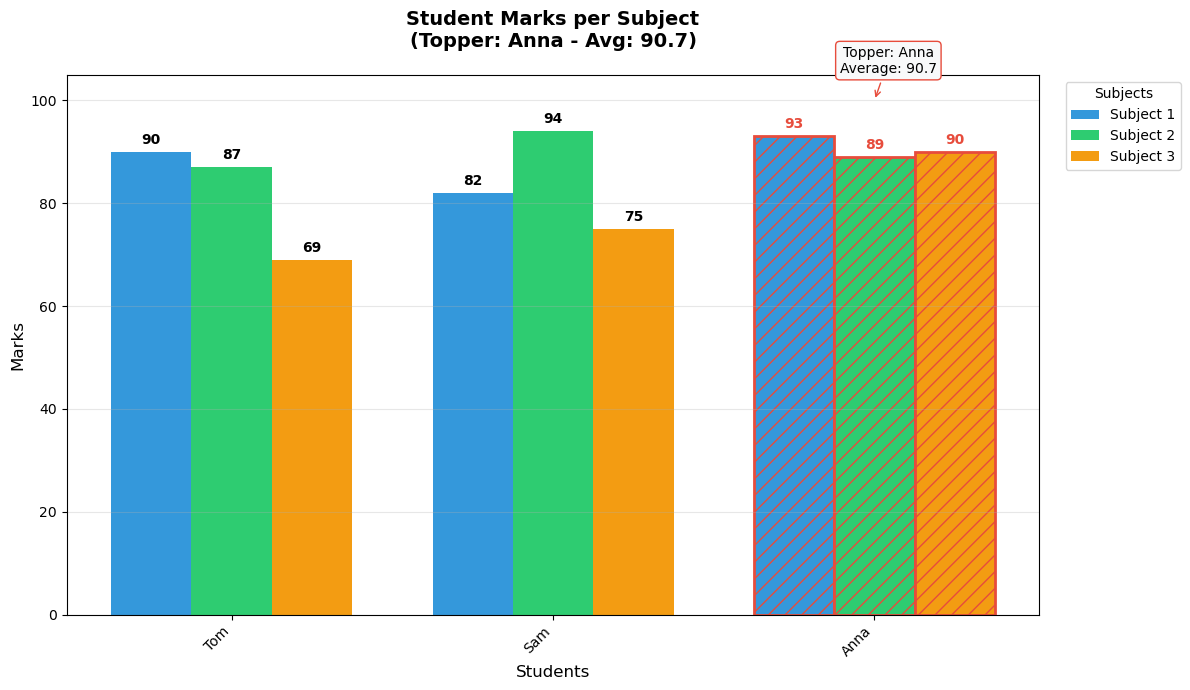

In [1]:
#Problem Statement - 1: Student Marks and Grades Summary

import matplotlib.pyplot as plt
import numpy as np

def calculate_grades():
    # Dictionary to store student data
    students = {}
    
    # Input number of students
    num_students = int(input("Enter number of students: "))
    
    # Input student data
    for i in range(num_students):
        name = input(f"\nEnter student {i+1} name: ")
        marks = []
        for j in range(3):
            mark = float(input(f"Enter mark for subject {j+1}: "))
            marks.append(mark)
        students[name] = marks
    
    # Print text report
    print("\nStudent Report:")
    print("-" * 65)
    print(f"{'Name':<15}{'Sub1':<8}{'Sub2':<8}{'Sub3':<8}{'Total':<10}{'Avg':<10}{'Grade':<6}")
    print("-" * 65)
    
    class_total = 0
    topper_name = ""
    topper_avg = 0
    topper_index = 0
    
    for idx, (name, marks) in enumerate(students.items()):
        total = sum(marks)
        avg = total / 3
        class_total += avg
        
        # Grade calculation
        if avg >= 90:
            grade = 'A'
        elif avg >= 80:
            grade = 'B'
        elif avg >= 70:
            grade = 'C'
        elif avg >= 60:
            grade = 'D'
        else:
            grade = 'F'
        
        if avg > topper_avg:
            topper_avg = avg
            topper_name = name
            topper_index = idx
        
        print(f"{name:<15}{marks[0]:<8.1f}{marks[1]:<8.1f}{marks[2]:<8.1f}{total:<10.1f}{avg:<10.1f}{grade:<6}")
    
    class_avg = class_total / num_students
    
    # Print summary with topper information
    print("\nClass Summary:")
    print("-" * 30)
    print(f"Class Average: {class_avg:.1f}")
    print(f"Topper: {topper_name} with average {topper_avg:.1f}")
    print("-" * 30)
    
    # Create grouped bar chart with topper highlight
    plt.figure(figsize=(12, 7))
    
    # Set up data
    student_names = list(students.keys())
    subjects = ['Subject 1', 'Subject 2', 'Subject 3']
    bar_width = 0.25
    x = np.arange(len(student_names))
    
    # Colors for subjects
    colors = ['#3498db', '#2ecc71', '#f39c12']  # Blue, Green, Orange
    
    # Plot all bars
    bars = []
    for i in range(3):
        subject_marks = [marks[i] for marks in students.values()]
        bars.append(plt.bar(x + i*bar_width, subject_marks, bar_width, 
                          label=subjects[i], color=colors[i]))
    
    # Highlight topper's bars
    for i in range(3):
        bars[i][topper_index].set_edgecolor('#e74c3c')  # Red border
        bars[i][topper_index].set_linewidth(2)
        bars[i][topper_index].set_hatch('//')
    
    # Customize chart
    plt.title(f'Student Marks per Subject\n(Topper: {topper_name} - Avg: {topper_avg:.1f})', 
              pad=20, fontweight='bold', fontsize=14)
    plt.xlabel('Students', fontsize=12)
    plt.ylabel('Marks', fontsize=12)
    plt.xticks(x + bar_width, student_names, rotation=45, ha='right')
    plt.ylim(0, 105)
    
    # Add value labels
    for i in range(len(student_names)):
        for j in range(3):
            height = list(students.values())[i][j]
            va = 'bottom' if height > 10 else 'top'
            color = 'black' if i != topper_index else '#e74c3c'
            plt.text(x[i] + j*bar_width, height + 1, f'{height:.0f}', 
                    ha='center', va=va, color=color, fontsize=10, fontweight='bold')
    
    # Add legend and grid
    plt.legend(title='Subjects', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    
    # Add annotation for topper
    plt.annotate(f'Topper: {topper_name}\nAverage: {topper_avg:.1f}',
                xy=(x[topper_index] + bar_width, 100),
                xytext=(10, 20), textcoords='offset points',
                bbox=dict(boxstyle='round', fc='#f8f9fa', ec='#e74c3c'),
                arrowprops=dict(arrowstyle='->', color='#e74c3c'),
                fontsize=10, ha='center')
    
    plt.tight_layout()
    plt.show()

# Run the program
calculate_grades()